In [23]:
from metal.nn import NeuralNetwork
from metal.utils import train_test_split, to_categorical, normalize,standardize
from metal.utils import get_random_subsets, shuffle_data, Plot
from metal.utils.data_operation import accuracy_score
from metal.optimizers import StochasticGradientDescent,Adam
from metal.loss_functions import CrossEntropy
from metal.utils.misc import bar_widgets
from metal.layers.dropout import Dropout

from metal.layers.batchnormalization_ import BatchNormalization
from metal.layers.dense_ import Dense
from metal.layers.conv2D_ import Conv2D
from metal.layers.flatten_ import Flatten
from metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from metal.models.convnet import ConvNet
import h5py

In [24]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np
import PIL
from PIL import Image
import urllib
from skimage.transform import resize

In [25]:
import sys
import resource

print('resource limit ',resource.getrlimit(resource.RLIMIT_STACK))
print('recursion limit ',sys.getrecursionlimit())
max_rec = 100000
sys.setrecursionlimit(max_rec)

resource limit  (8388608, 8388608)
recursion limit  100000


In [26]:
import numpy as np
import scipy.ndimage as ndi

def img_tran(imgs_in,size):
    factor = size/imgs_in.shape[1]
    imgs_out = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    print(imgs_out.shape)
    return imgs_out

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (_, _) = fashion_mnist.load_data()

X_train = X_train[:50000].reshape(50000, 28, 28, 1)
y_train = y_train[:50000]
X_train = img_tran(X_train,12)


(50000, 12, 12, 1)


In [29]:
#X_train = np.concatenate((X_train, X_test), axis=0)
#y_train = np.concatenate((y_train, y_test), axis=0)

In [30]:
y_train = to_categorical(y_train.astype("int"))


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.4, seed = 9)

In [32]:
X_train.shape,X_test.shape

((30000, 12, 12, 1), (20000, 12, 12, 1))

In [33]:
optimizer = Adam()
loss = CrossEntropy

In [34]:
X_train = X_train.reshape((-1,1,12,12))/255.0
X_test = X_test.reshape((-1,1,12,12))/255.0

In [35]:
X_train = Parameter(X_train, requires_grad=True)
X_test = Parameter(X_test, requires_grad=True)
y_train = Parameter(y_train, requires_grad=True)
y_test = Parameter(y_test, requires_grad=True)

In [36]:
BatchNormalization

metal.layers.batchnormalization_.BatchNormalization

In [44]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))

In [45]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,12,12), padding='same', seed=1))
covnet.add(Activation('relu'))
covnet.add(Dropout(.25))
covnet.add(BatchNormalization())

covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, padding='same', seed=2))
covnet.add(Flatten(input_shape=(1,12,12)))
covnet.add(BatchNormalization())
covnet.add(Dense(256, seed=4))
covnet.add(Activation('relu'))
covnet.add(Dropout(.25))
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [ ]:
train_err, val_err = covnet.fit(X_train, y_train, n_epochs=10, batch_size=82)


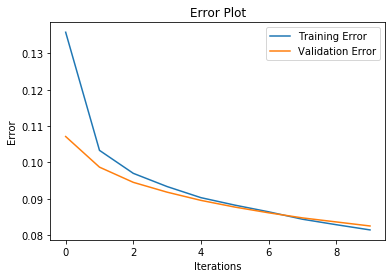

Accuracy: 0.83045


In [40]:
covnet.eval(X_test, y_test)

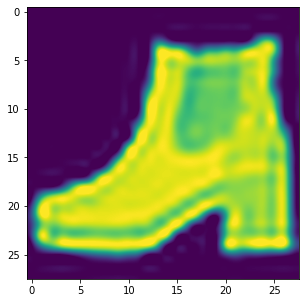

In [18]:
data_ = X_test[4].reshape(1,1,28,28)
plt.figure(figsize=(5,5))
plt.imshow(data_.data.reshape(data_.shape[-1],data_.shape[-2]), interpolation='lanczos')
plt.show()

In [19]:
covnet.predict(data_)

9

In [20]:
from metal.utils.production_util import fetch_img

resource limit  (8388608, 8388608)
recursion limit  100000


In [21]:
im = fetch_img('http://www.ems.com/on/demandware.static/-/Sites-vestis-master-catalog/default/dwa269c670/product/images/1289/354/1289354/1289354_206_main.jpg',(1,1,28,28))

In [22]:
im = im/255.0

In [23]:
covnet.predict(Parameter(im,False))

5

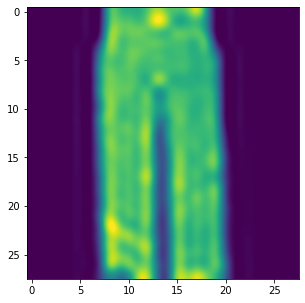

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(im.reshape(im.shape[-1],im.shape[-2]), interpolation='lanczos')
plt.show()

In [25]:
from metal.utils import normalize

In [30]:
data = "https://ae01.alicdn.com/kf/HTB1HXFcbvQs8KJjSZFEq6A9RpXaU/lil-peep-T-Shirt-Music-Man-Summer-Graphic-Tees-Singer-Male-New-Coming-Oversize-Clothing-Comfortable.jpg"
im = fetch_img(data,(1,1,28,28))

In [31]:
im = normalize(im)

In [32]:
covnet.predict(Parameter(im,False))

0

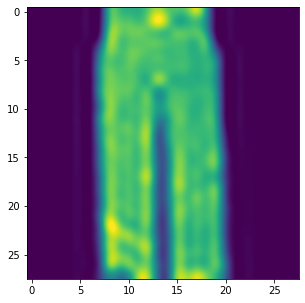

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(im.reshape(im.shape[-1],im.shape[-2]), interpolation='lanczos')
plt.show()